# Independent Component Analysis

In this exercise, you will implement the FastICA algorithm, and apply it to model independent components of a distribution of image patches. The description of the fastICA method is given in the paper *"A. Hyvärinen and E. Oja. 2000. Independent component analysis: algorithms and applications"* linked from ISIS, and we frequently refer to sections and equations in that paper.

Three methods are provided for your convenience:

* **`utils.load()`** extracts a dataset of image patches from an collection of images (contained in the folder `images/` that can be extracted from the `images.zip` file). The method returns a list of RGB image patches of size $12 \times 12$, presented as a matrix of size $\# patches \times 432$. (Note that $12 \cdot 12 \cdot 3 = 432$).


* **`utils.scatterplot(...)`** produces a scatter plot from a two-dimensional data set. Each point in the scatter plot represents one image patch.


* **`utils.render(...)`** takes a matrix of size $\# patches \times 432$ as input and renders these patches in the IPython notebook.

## Demo code

A demo code that makes use of these three methods is given below. The code performs basic analysis such as loading the data, plotting correlations between neighboring pixels, or different color channels of the same pixel, and rendering some image patches.

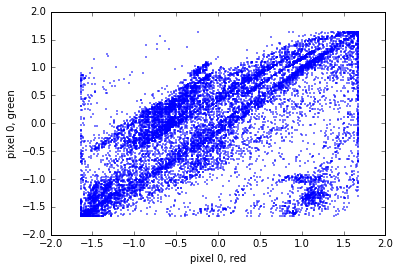

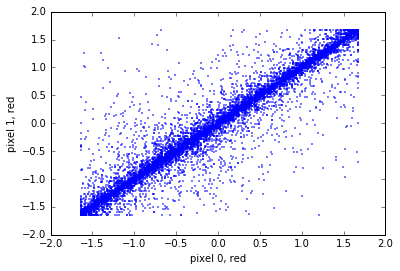

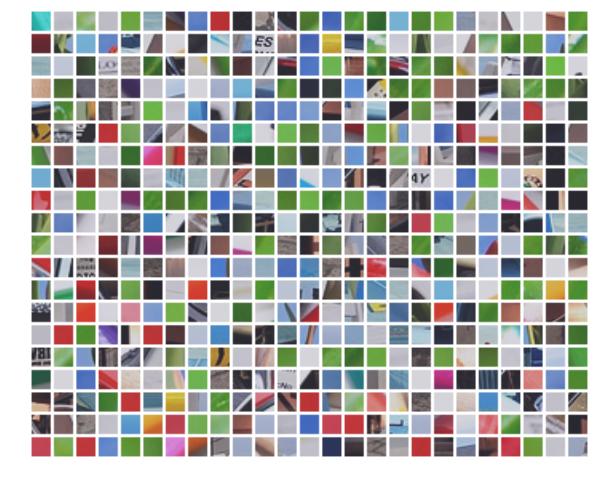

In [2]:
import utils
import numpy as np
%matplotlib inline

# Load the dataset of image patches
X = utils.load()

# Plot the red vs. green channel of the first pixel
utils.scatterplot(X[:,0],X[:,1],xlabel='pixel 0, red',ylabel='pixel 0, green')

# Plot the red channel of the first and second pixel
utils.scatterplot(X[:,0],X[:,3],xlabel='pixel 0, red',ylabel='pixel 1, red')

# Visualize 500 image patches from the image
utils.render(X[:500])

## Whitening (10 P)

Independent component analysis applies whitening to the data as a preprocessing step. The whitened data matrix $\tilde X$ is obtained by linear projection of $X$, such data such that $\mathrm{E}[\tilde x \tilde x^\top] = I$, where $\tilde x$ is a row of the whitened matrix $\tilde X$. See Section 5.2 of the paper for a complete description of the whitening procedure.

**Tasks:**

* **Implement a function that returns a whitened version of the data given as input.**
* **Add to this function a test that makes sure that $\mathrm{E}[\tilde x \tilde x^\top] \approx I$ (up to numerical accuracy).**
* **Reproduce the scatter plots of the demo code, but this time, using the whitened data.**
* **Render 500 whitened image patches.**

Whitening succeeded with numerical accuracy: 0.010000


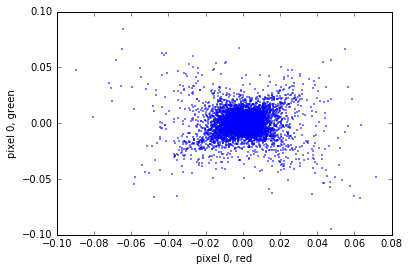

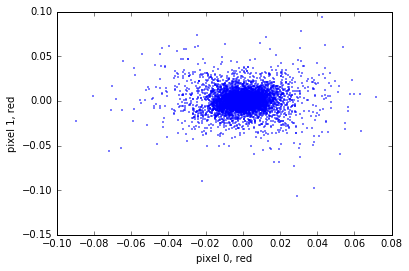

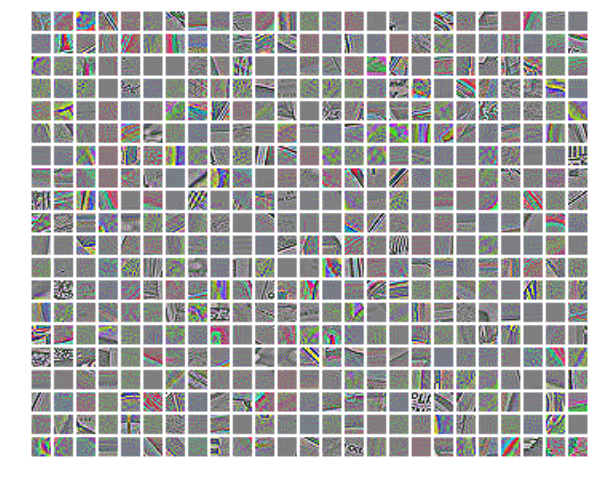

In [3]:
def whitening(X_true):
    X = X_true - np.mean(X_true,0,keepdims=True)
    
    d,V = np.linalg.eigh(np.dot(X,X.T))
    
    D = np.diag((d+1e-10)**-0.5)
    
    K = np.dot(np.dot(V,D),V.T)
    
    A = np.dot(K,X)
    
    return A

def test_whitening(A):
    
    R = np.dot(A,A.T)
    
    failed = True
    for tolerance in np.logspace(-10,0,11):
        close = np.all(np.isclose(R,np.identity(R.shape[0]),tolerance,tolerance))
        if close:
            print "Whitening succeeded with numerical accuracy: %f"%tolerance
            failed = False
            break
    
    if failed:
        print "Whitening failed."
    
    # Plot the red vs. green channel of the first pixel
    utils.scatterplot(A.T[:,0],A.T[:,1],xlabel='pixel 0, red',ylabel='pixel 0, green')

    # Plot the red channel of the first and second pixel
    utils.scatterplot(A.T[:,0],A.T[:,3],xlabel='pixel 0, red',ylabel='pixel 1, red')

    # Visualize 500 image patches from the image
    utils.render(A.T[:500])


dat = utils.load().T
A = whitening(dat)
test_whitening(A)

## Implementing FastICA (20 P)


We now would like to learn 100 independent components of the distribution of whitened image patches. For this, we follow the procedure described in the Chapter 6 of the paper. Implementation details specific to this exercise are given below:


* **Nonquadratic function G**: In this exercise, we will make use of the nonquadratic function $G(x) = \frac1a \log \cosh (a x)$, proposed in Section 4.3.2 of the paper, with $a=1.5$. This function admits as a derivative the function $g(x) = \tanh(a x)$, and as a double derivative the function $g'(x) = a \cdot (1-\tanh^2(a x))$.


* **Number of iterations**: The FastICA procedure will be run for 64 iterations. Note that the training procedure can take a relatively long time (up to 5 minutes depending on the system). Therefore, during the developement phase, it is advised to run the algorithm for a fraction of the total number of iterations.


* **Objective function**: The objective function that is maximized by the ICA training algorithm is given in Equation 25 of the paper. Note that since we learn 100 independent components, the objective function is in fact the *sum* of the objective functions of each independent components.


* **Finding multiple independent components**: Conceptually, finding multiple independent components as described in the paper is equivalent to running multiple instances of FastICA (one per independent component), under the constraint that the components learned by these instances are decorrelated. In order to keep the learning procedure computationally affordable, the code must be parallelized, in particular, make use of numpy matrix multiplications instead of loops whenever it is possible.


* **Weight decorrelation**: To decorrelate outputs, we use the inverse square root method given in Equation 45.


**Tasks:**

* **Implement the FastICA method described in the paper, and run it for 64 iterations.**

* **Print the value of the objective function at each iteration.**

* **Create a scatter plot of the projection of the whitened data on two distinct independent components after 0, 1, 3, 7, 15, 31, 63 iterations.**

* **Visualize the learned independent components using the function `render(...)`.**

Step 0 with Objective J(y) = 93.588913


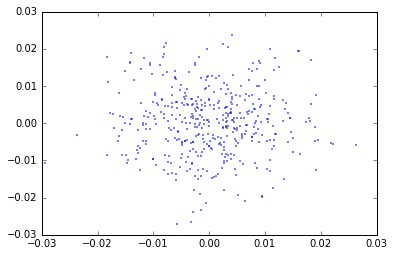

Step 1 with Objective J(y) = 93.588913


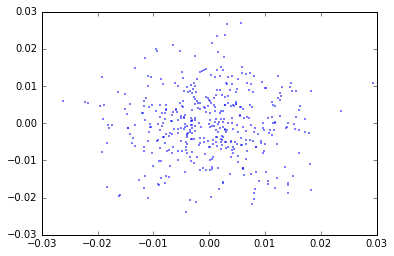

Step 2 with Objective J(y) = 93.588913
Step 3 with Objective J(y) = 93.588913


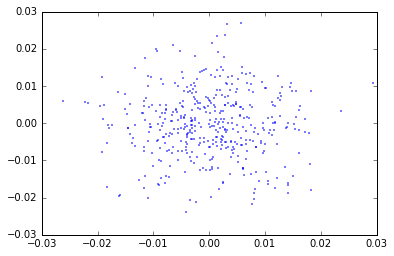

Step 4 with Objective J(y) = 93.588913
Step 5 with Objective J(y) = 93.588913
Step 6 with Objective J(y) = 93.588913
Step 7 with Objective J(y) = 93.588913


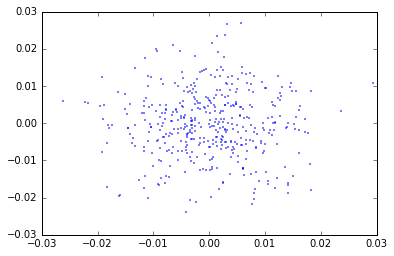

Step 8 with Objective J(y) = 93.588913
Step 9 with Objective J(y) = 93.588913
Step 10 with Objective J(y) = 93.588913
Step 11 with Objective J(y) = 93.588913
Step 12 with Objective J(y) = 93.588913
Step 13 with Objective J(y) = 93.588913
Step 14 with Objective J(y) = 93.588913
Step 15 with Objective J(y) = 93.588913


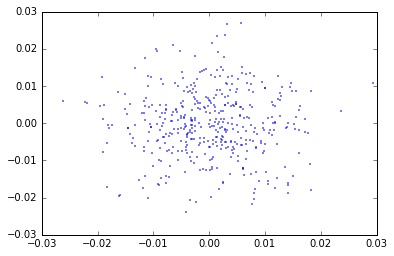

Step 16 with Objective J(y) = 93.588913
Step 17 with Objective J(y) = 93.588913
Step 18 with Objective J(y) = 93.588913
Step 19 with Objective J(y) = 93.588913
Step 20 with Objective J(y) = 93.588913
Step 21 with Objective J(y) = 93.588913
Step 22 with Objective J(y) = 93.588913
Step 23 with Objective J(y) = 93.588913
Step 24 with Objective J(y) = 93.588913
Step 25 with Objective J(y) = 93.588913
Step 26 with Objective J(y) = 93.588913
Step 27 with Objective J(y) = 93.588913
Step 28 with Objective J(y) = 93.588913
Step 29 with Objective J(y) = 93.588913
Step 30 with Objective J(y) = 93.588913
Step 31 with Objective J(y) = 93.588913


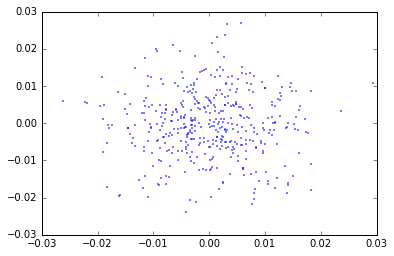

Step 32 with Objective J(y) = 93.588913
Step 33 with Objective J(y) = 93.588913
Step 34 with Objective J(y) = 93.588913
Step 35 with Objective J(y) = 93.588913
Step 36 with Objective J(y) = 93.588913
Step 37 with Objective J(y) = 93.588913
Step 38 with Objective J(y) = 93.588913
Step 39 with Objective J(y) = 93.588913
Step 40 with Objective J(y) = 93.588913
Step 41 with Objective J(y) = 93.588913
Step 42 with Objective J(y) = 93.588913
Step 43 with Objective J(y) = 93.588913
Step 44 with Objective J(y) = 93.588913
Step 45 with Objective J(y) = 93.588913
Step 46 with Objective J(y) = 93.588913
Step 47 with Objective J(y) = 93.588913
Step 48 with Objective J(y) = 93.588913
Step 49 with Objective J(y) = 93.588913
Step 50 with Objective J(y) = 93.588913
Step 51 with Objective J(y) = 93.588913
Step 52 with Objective J(y) = 93.588913
Step 53 with Objective J(y) = 93.588913
Step 54 with Objective J(y) = 93.588913
Step 55 with Objective J(y) = 93.588913
Step 56 with Objective J(y) = 93.588913


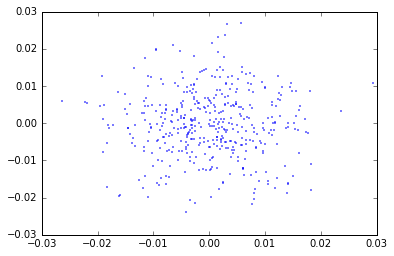

(432, 432)


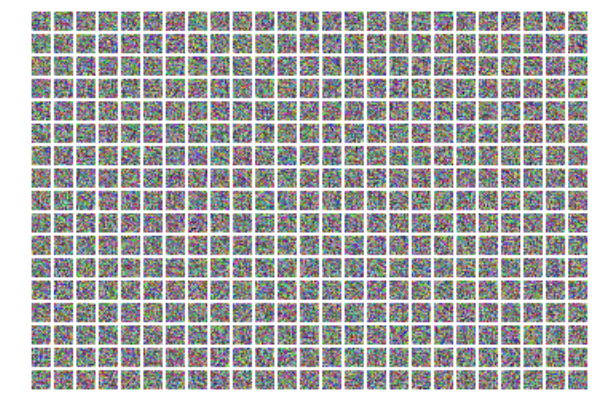

In [19]:
def fastICA(X_true,n_comp=100,max_iter=64):
    
    X = whitening(X_true)[:,:n_comp]
    W_init = np.random.normal(size=(n_comp,n_comp))
    
    a = 1.5
    def G(x): return np.log(np.cosh(a*x))/a
    def g(x): return np.tanh(a*x)
    def g_(x): return a*(1.-np.tanh(a*x)**2)
    
    E_G_gaussian = np.mean(G(W_init)) #reuse W_init
    def J(y): return np.sum((np.mean(G(y),1) - E_G_gaussian)**2)
    
    def sym_decorr(w): 
        d, F = np.linalg.eigh(np.dot(w,w.T))
        return np.dot(np.dot(np.dot(F,np.diag(1./np.sqrt(d))),F.T),w)
    
    plot_steps = [0,1,3,7,15,31,63]
    
    W = sym_decorr(W_init)
    for step in range(max_iter):
        wtx = np.dot(W.T,X.T)
        W = np.dot(g(wtx),X)/float(X.shape[1]) - np.dot(np.diag(g_(wtx).mean(1)),W)
        
        W = sym_decorr(W)
        
        print "Step %d with Objective J(y) = %f"%(step,J(W))
        if step in plot_steps:
            proj = np.dot(W.T,X.T)
            utils.scatterplot(proj[:,0],proj[:,1])
    
    print X.shape
    proj = np.dot(W.T,X.T)
    utils.render(proj)
    
dat = utils.load().T

W = fastICA(dat,100,64)
    